[*********************100%***********************]  1 of 1 completed


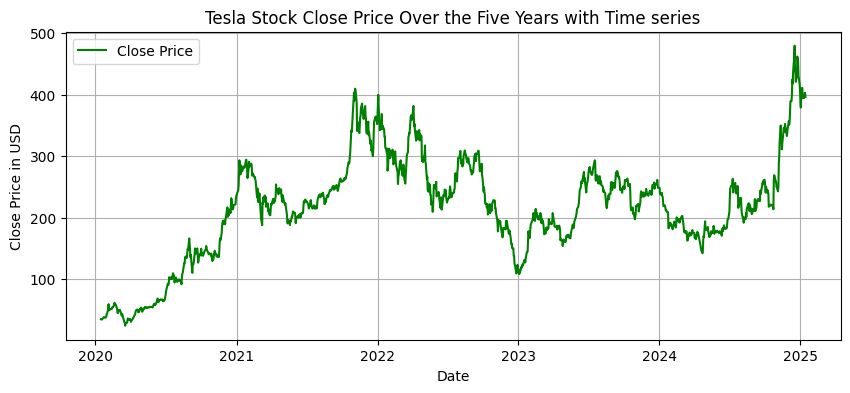

Mean Squared Error: 9035.92


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


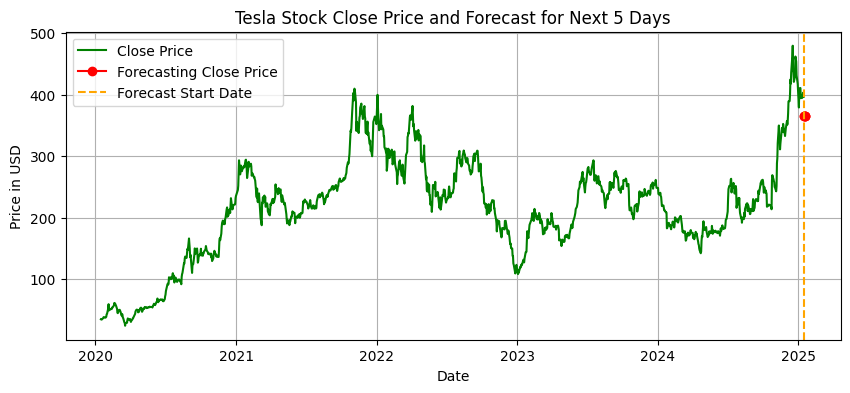

In [58]:


#Importing necessary libraries
import yfinance as yf #Import data yahoo finance python library
import numpy as np #Numpy for numeric calculations
import pandas as pd #pandas
import matplotlib.pyplot as plt #Matplot for plotting
from sklearn.model_selection import train_test_split #sklearn-library to train test and original data
from sklearn.ensemble import RandomForestRegressor #ensemble for train data with multiple decision trees
from sklearn.metrics import mean_squared_error #Use to evaluate the performance of the regression model to calculate mean square error
from datetime import timedelta #Used to perform data arithmatic calaculation

#Load Tesla Data
# First I don't know what is a ticker after some research i know what that is
ticker     = "TSLA" #For stock ticker I put 'TSLA' for tesla symbol
start_date = '2020-01-15' #Traing One year data to today
end_date   = '2025-01-15' #Current Date

#Download Data from yahoo finance library

tesla_data = yf.download(ticker ,start = start_date, end = end_date ) #This is the historical data

#Plotting close price over time for 5 years with time series analysis - graph1

plt.figure(figsize=(10, 4)) # Sets the size of the figure for the graph,width and height
plt.title('Tesla Stock Close Price Over the Five Years with Time series') # Set the title for the for the graph
plt.xlabel('Date') # Set the value name for x timeline
plt.ylabel('Close Price in USD') # set the value name for y timeline
plt.plot(tesla_data['Close'], label='Close Price', color='green')# plot the close price with the color line and name the plot
plt.legend() # For seperating the plots for clear vizual
plt.grid() # grid is help for easier reading
plt.show() # show is used to get ouptut of the plot or view the plot


#Prepare Data for RandomForestRegressor

tesla_data['Day'] = tesla_data.index.dayofyear  # Create a feature for day of the year for everyday in the time

#Define features and target variable (Input and Output)

X = tesla_data[['Day']]  # Feature: Day of the year

#convert y-axis to one dimension array

y = tesla_data['Close'].values.ravel() #ravel convert md to 1d

#Splitting Datas into Training and Test datasets

X_train, X_test,\
y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)\
#test size is the data allocation #random state is set to 42 as default

#Training the RandomForestRegressor

model_1 = RandomForestRegressor(n_estimators=100, random_state=42)# estimators are used to give decision trees to 100
model_1.fit(X_train, y_train) #Model is then trained using .fit function

#Make predictions on test set

y_predict = model_1.predict(X_test) #predictions are made on test set using .predict function

#Calculate mean squared error

mse = mean_squared_error(y_test, y_predict) #mean squared error is calculated
print(f'Mean Squared Error: {mse:.2f}')#print the mean square error

#Forecasting Close Price for Next 5 Days

future_days = pd.DataFrame\
 ({'Day': [tesla_data['Day'].max() + i for i in range(1, 6)]#range here mentioned for the future dates
  })
future_predictions = model_1.predict(future_days)

#Creating DataFrame for Future Dates and Predictions

future_dates = [tesla_data.index[-1] + timedelta(days=i) for i in range(1, 6)]#use of timedelta from datetime
forecast_df = pd.DataFrame({'Date': future_dates, 'Predicted Close': future_predictions}) #use dataframe structure for organize data

#Plot Original Data and Forecast Together - Graph2

plt.figure(figsize=(10, 4)) #Set the figure size of the graph height and width
plt.title('Tesla Stock Close Price and Forecast for Next 5 Days')#Title of the graph
plt.xlabel('Date')# value for x-axis
plt.ylabel('Price in USD') #value for y-axis
plt.plot(tesla_data['Close'], label='Close Price', color='green') # put the close price in color line and name it
plt.plot(forecast_df['Date'], forecast_df['Predicted Close'], label='Forecasting Close Price', color='red', marker='o') # the marker for the furture dates
plt.axvline(x=tesla_data.index[-1], color='orange', linestyle='--', label='Forecast Start Date') #start date of future forecasting
plt.legend()# to differentiate the plot
plt.grid()#to view the plot clearly
plt.show()#to show the output of the plot

